# Workers in Norwegian Hospitals
> Are they well enough supplied, and how will quarantines/infections in the system affect us?
- author: Joakim Rishaug
- comments: true
- toc: true

In [ ]:
#hide
!curl https://redutv-api.vg.no/corona/v1/hospitalized >> "data.json"

In [37]:
#hide
import json
from copy import deepcopy

data = json.load(open('data.json', 'r'))

hospital_employees = {'Akershus universitetssykehus': 9000,
                      'Oslo universitetssykehus': 23000,
                      'Haukeland universitetssykehus': 12000,
                      'Stavanger universitetssykehus': 7000,
                      'St. Olavs hospital': 11000,
                      'Sykehuset Østfold': 5400,
                      'Sykehuset i Vestfold': 4000,
                      'Sykehuset Telemark': 4000,
                      'Bærum sykehus': 2000,
                      'Drammen sykehus': 3000,
                      'Universitetssykehuset Nord-Norge': 6000,
                      'Ringerike sykehus': 1000,
                      'Kongsberg sykehus': 1000}

unq_hosp_emp = set(list(hospital_employees.keys()))

hosp_curr_data = data['current']['hospitals']
unq_hosp = set([x['name'] for x in hosp_curr_data])

hosp = deepcopy(hospital_employees)
hosp_hist = [v for k,v in data['current']['timeseries']['hospitals'].items()]

for x in hosp_hist:
  n = x['name']
  if n in unq_hosp_emp:
    new_entry = {'employees': hosp[n]}
    new_entry.update(x)
    hosp[n] = new_entry
    
%matplotlib inline
import numpy as np
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 10]
#import arviz as az
#import pymc3 as pm
#import altair as alt

#import load_covid_data

sns.set_context('talk')
plt.style.use('seaborn-whitegrid')

get_or_zero = lambda v,n: v.get(n) if v.get(n) else 0
dates = list(sorted(hosp['Universitetssykehuset Nord-Norge']['quarantineEmployees'].keys()))
plot_num_days = 6
plot_dates = dates[-plot_num_days:]

def plot_hosp(hosp, target, perc=False):
    legend = []
    for k,v in hosp.items():
        if v[target][plot_dates[-1]]:
            legend.append(k)
            vals = [get_or_zero(v[target], x) for x in plot_dates]
            tot_emps = v['employees']

            if perc:
                vals = [x / tot_emps * 100 for x in vals]

            plt.plot(plot_dates, vals)
    
    plt.legend(legend, ncol=2, loc='upper left', framealpha=0.3);

# Workers in Norwegian Hospitals

Total number of quarantined employees


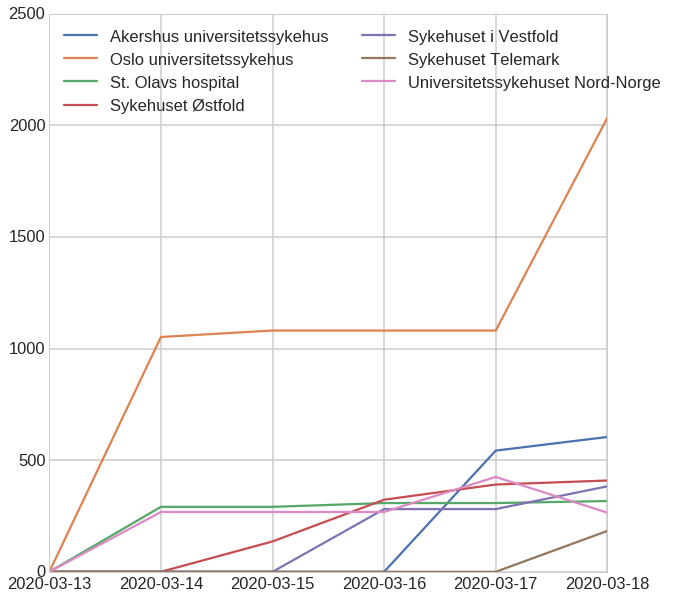

In [38]:
#hide_input
print('Total number of quarantined employees')
plot_hosp(hosp, 'quarantineEmployees')

Percentage of quarantined employees


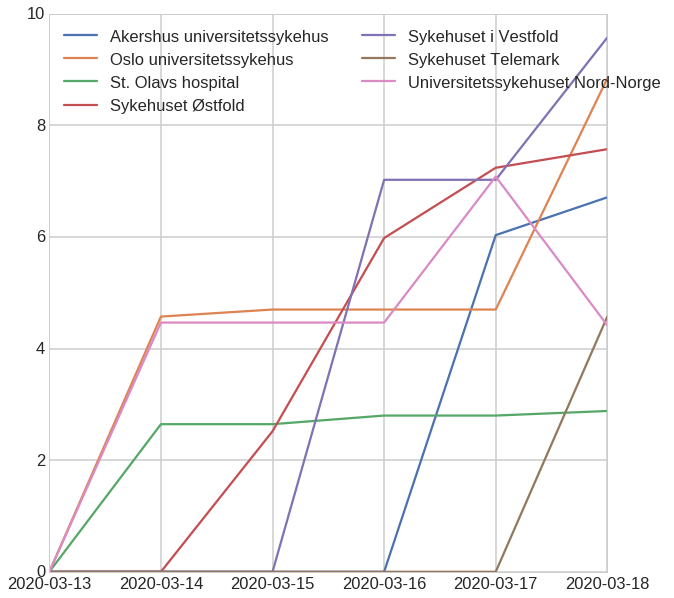

In [35]:
#hide_input
print('Percentage of quarantined employees')
plot_hosp(hosp, 'quarantineEmployees', perc=True)

# Sources
Number of employees mostly sourced from: https://no.wikipedia.org/wiki/Liste_over_norske_sykehus

Data on hospitalization source: www.vg.no